<a href="https://colab.research.google.com/github/d0rtilla/AbaloneAgePredictionProject/blob/main/Abalone_Age_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abalone Age Predictor with Supervised Machine Learning

## Contributors: Jacob Douthett, Sam Espe, Alan Jallah, Jae Neuharth

### Extract and Transform Data
In this section, we load the required libraries, install Keras Tuner on our colab environment, connect our colab to our google drive, and load / clean our dataset.

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import tensorflow as tf

In [2]:
# Install Keras Tuner in the Google Colab environment
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Read in raw data from Amazon S3 bucket
file_path = "https://abalone-machine-learning-data.s3.us-east-2.amazonaws.com/abalone.csv"
df = pd.read_csv(file_path)
display(df)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
# Look for duplicate entries
print(f"Duplicate entries: {df.duplicated().sum()}")

Duplicate entries: 0


In [5]:
# Check for missing values
df.isnull().sum(axis = 0)


Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
# One-hot encode sex column
df = pd.get_dummies(df)
display(df)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [7]:
# Rename columns to Python-friendly names

df = df.rename(columns = {"Whole weight": "Whole_weight", "Shucked weight": "Shucked_weight", "Viscera weight": "Viscera_weight", "Shell weight": "Shell_weight"})
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


### Visualizing Parameters
In this section, we use matplotlib to visualize and compare each datapoint's various parameters against its number of rings. We did this to identify any outliers, as well as to get a feel for how our data are distributed in the various dimensions.

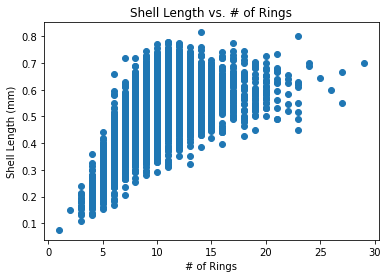

In [8]:
# Graph the distribution of Lengths
x = df["Rings"]
length = df["Length"]

plt.scatter(x, length)
plt.title("Shell Length vs. # of Rings")
plt.xlabel("# of Rings")
plt.ylabel("Shell Length (mm)")
plt.show()

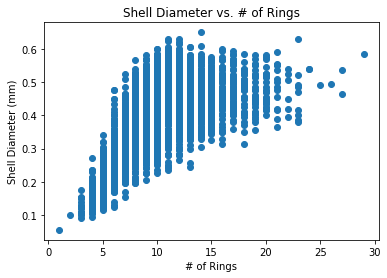

In [9]:
# Graph the distribution of Diameters
diameter = df["Diameter"]

plt.scatter(x, diameter)
plt.title("Shell Diameter vs. # of Rings")
plt.xlabel("# of Rings")
plt.ylabel("Shell Diameter (mm)")
plt.show()

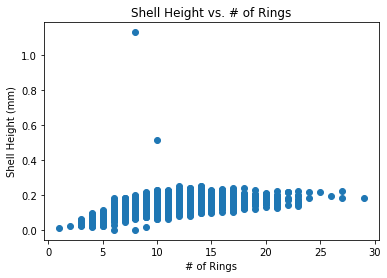

In [10]:
# Graph the distribution of Heights
height = df["Height"]

plt.scatter(x, height)
plt.title("Shell Height vs. # of Rings")
plt.xlabel("# of Rings")
plt.ylabel("Shell Height (mm)")
plt.show()

In [11]:
# Isolating the two samples that have heights greater than 0.4 (far above the rest of the distribution)
df.loc[df["Height"] > 0.4]

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
1417,0.705,0.565,0.515,2.210,1.1075,0.4865,0.5120,10,0,0,1
2051,0.455,0.355,1.130,0.594,0.3320,0.1160,0.1335,8,1,0,0


In [12]:
# Isolating the two samples that have a height of 0
df.loc[df["Height"] == 0]

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
1257,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8,0,1,0
3996,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6,0,1,0


In [13]:
# Create new dataframe without outliers

df_no_outliers = df.drop(index = [1417, 2051, 1257, 3996])

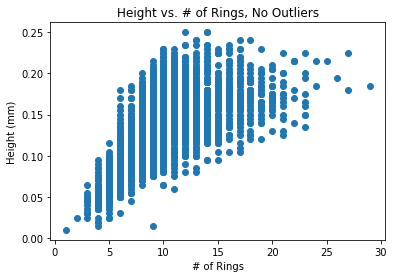

In [14]:
# Graph the distribution of Heights without the outliers
x_no = df_no_outliers["Rings"]
height_no = df_no_outliers["Height"]

plt.scatter(x_no, height_no)
plt.title("Height vs. # of Rings, No Outliers")
plt.xlabel("# of Rings")
plt.ylabel("Height (mm)")
plt.show()

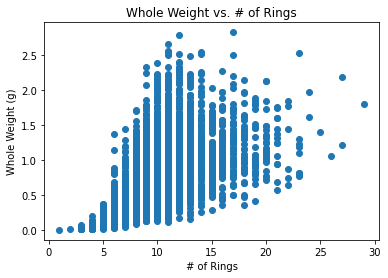

In [15]:
# Graph the distribution of Whole Weights
whole = df["Whole_weight"]

plt.scatter(x, whole)
plt.title("Whole Weight vs. # of Rings")
plt.xlabel("# of Rings")
plt.ylabel("Whole Weight (g)")
plt.show()

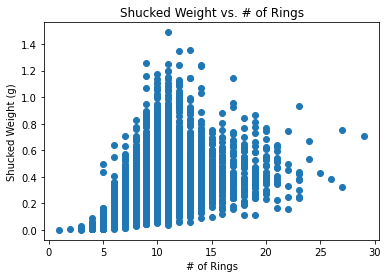

In [16]:
# Graph the distribution of Shucked Weights
shucked = df["Shucked_weight"]

plt.scatter(x, shucked)
plt.title("Shucked Weight vs. # of Rings")
plt.xlabel("# of Rings")
plt.ylabel("Shucked Weight (g)")
plt.show()

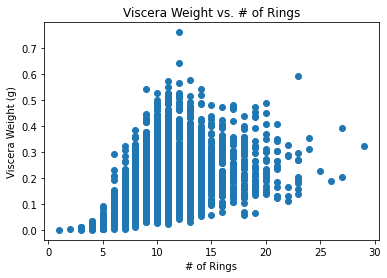

In [17]:
# Graph the distribution of Viscera Weights
viscera = df["Viscera_weight"]

plt.scatter(x, viscera)
plt.title("Viscera Weight vs. # of Rings")
plt.xlabel("# of Rings")
plt.ylabel("Viscera Weight (g)")
plt.show()

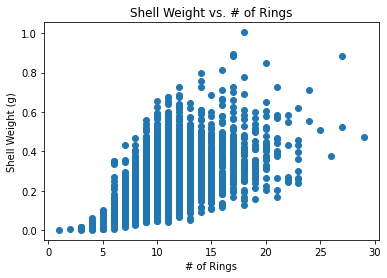

In [18]:
# Graph the distribution of Shell Weights 
shell = df["Shell_weight"]

# X = Rings | Y = Shell Weight
plt.scatter(x, shell)
plt.title("Shell Weight vs. # of Rings")
plt.xlabel("# of Rings")
plt.ylabel("Shell Weight (g)")
plt.show()

### Multiple Linear Regressions

We started our analysis by trying to use a Multiple Linear Regression to fit our data. 

#### Multiple Linear Regression Model #1

We first tried creating a multiple linear regression model on the entire data set, including the height outliers. 

This resulted in an R^2 value of 50.785%.

In [20]:
# Create model

multLinReg = LinearRegression()

In [21]:
# Split data into training and testing sets

X = df.drop(columns = "Rings")
y = df["Rings"]

In [22]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)

In [23]:
# Instantiate standard scaler

scaler = StandardScaler()

In [24]:
# Fit scaler to training data
scaler.fit(X_train) 


StandardScaler()

In [25]:
# Scale X train and test data 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Train model

multLinReg.fit(X_train_scaled, y_train)

LinearRegression()

In [27]:
# Test model

multLinReg.predict(X_test_scaled)

array([10.93318904, 11.14649789, 11.50648478, ...,  8.19775703,
        9.65056996, 12.27414972])

In [28]:
# Evaluate model on training set
multLinReg.score(X_train_scaled, y_train)

0.5458379428502007

In [29]:
# Evaluate model on test set

multLinReg.score(X_test_scaled, y_test)

0.5078501514842158

#### Multiple Linear Regression Model #2 

We performed our second Multiple Linear Regression on a subset of the original data set, where we excluded four data entries that appeared to be outliers in the height parameter.

This improved the model's performance slightly, giving an R^2 value of 51.986%.

In [32]:
# Create model
multLinReg2 = LinearRegression()

In [33]:
# Split data into training and testing sets
X_no = df_no_outliers.drop(columns = "Rings")
y_no = df_no_outliers["Rings"]

In [34]:
# Split data into training and testing sets
X_no_train, X_no_test, y_no_train, y_no_test = train_test_split(X_no, y_no, random_state = 3)

In [35]:
# Instantiate standard scaler
scaler_no = StandardScaler()

In [36]:
# Fit scaler to training data
scaler_no.fit(X_no_train)

StandardScaler()

In [37]:
# Scale training and testing data
X_no_train_scaled = scaler_no.transform(X_no_train)
X_no_test_scaled = scaler_no.transform(X_no_test)

In [38]:
# Train model
multLinReg2.fit(X_no_train_scaled, y_no_train)

LinearRegression()

In [39]:
# Test model
multLinReg2.predict(X_no_test_scaled)

array([ 8.4027033 ,  9.68212737, 10.61402308, ...,  7.05080196,
        8.13314824,  9.30942069])

In [40]:
# Evaluate model on training set
multLinReg2.score(X_no_train_scaled, y_no_train)

0.5506328743094396

In [41]:
# Evaluate model on test set
multLinReg2.score(X_no_test_scaled, y_no_test)

0.5198595463446136

#### Multiple Linear Regression #3

Because the data set consists entirely of positive numbers, we experimented with using the MinMax scaler instead of the Standard Scaler to see if it could improve our model.

We got an R^2 value of 51.952%. Because it didn't increase the performance of the model, we reverted to the Standard scaler.

In [44]:
# Create model
multLinReg3 = LinearRegression()

In [45]:
# Split data into training and testing sets
X_minmax = df_no_outliers.drop(columns = "Rings")
y_minmax = df_no_outliers["Rings"]

In [46]:
# Split data into training and test sets
X_minmax_train, X_minmax_test, y_minmax_train, y_minmax_test = train_test_split(X_minmax, y_minmax, random_state = 3)

In [47]:
# Instantiate MinMax Scaler
scaler_minmax = MinMaxScaler()

In [48]:
# Fit scaler to data
scaler_minmax.fit(X_minmax_train)

MinMaxScaler()

In [49]:
# Scale data 
X_minmax_train_scaled = scaler_minmax.transform(X_minmax_train)
X_minmax_test_scaled = scaler_minmax.transform(X_minmax_test)

In [50]:
# Train model
multLinReg3.fit(X_minmax_train_scaled, y_minmax_train)

LinearRegression()

In [51]:
# Test model
multLinReg3.predict(X_minmax_test_scaled)

array([ 8.421875,  9.703125, 10.640625, ...,  7.03125 ,  8.171875,
        9.3125  ])

In [52]:
# Evaluate training set
multLinReg3.score(X_minmax_train_scaled, y_minmax_train)

0.5506211574152733

In [53]:
# Evaluate testing set
multLinReg3.score(X_minmax_test_scaled, y_minmax_test)

0.5195227159847559

A multiple linear regression doesn't seem to be working.

### k-Nearest Neighbors Regressor

Our next model to try was the k-Nearest Neighbors Regressor. 

In [56]:
# Import k-Nearest Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor

In [57]:
# Create model
knn = KNeighborsRegressor()

In [58]:
# Split target column from features
X_knn = df_no_outliers.drop(columns = "Rings")
y_knn = df_no_outliers["Rings"]

In [59]:
# Split data into training and testing sets
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, y_knn, random_state = 3)

In [60]:
# Instantiate standard scaler
scaler = StandardScaler()

In [61]:
# Fit scaler to training data
scaler.fit(X_knn_train)

StandardScaler()

In [62]:
# Scale data
X_knn_train_scaled = scaler.transform(X_knn_train)
X_knn_test_scaled = scaler.transform(X_knn_test)

k: 1, Train/Test Score: 1.000/0.130
k: 3, Train/Test Score: 0.713/0.435
k: 5, Train/Test Score: 0.659/0.473
k: 7, Train/Test Score: 0.632/0.506
k: 9, Train/Test Score: 0.617/0.510
k: 11, Train/Test Score: 0.603/0.516
k: 13, Train/Test Score: 0.597/0.514
k: 15, Train/Test Score: 0.588/0.511
k: 17, Train/Test Score: 0.580/0.511
k: 19, Train/Test Score: 0.574/0.510


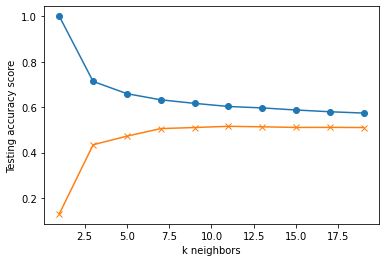

In [63]:
# Test various values of k to find where the change in performance levels off
# Borrowed and adapted from 19.2 Activity 6
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("Value of k")
plt.ylabel("Testing accuracy score")
plt.show()

It appears that the graph levels off around k = 7. We decided to see what results we would get from k = 5, 7, and 9.

#### k-Nearest Neighbors where k = 7

This model produced an R^2 value of 51.758%, which is similar to our Multiple Linear Regression models. However, this model shows evidence of overfitting the data.

In [64]:
# Instantiate the model

knn7 = KNeighborsRegressor(n_neighbors=7)

In [65]:
# Train model
knn7.fit(X_knn_train_scaled, y_knn_train)

KNeighborsRegressor(n_neighbors=7)

In [66]:
# Evaluate model on training set
knn7.score(X_knn_train_scaled, y_knn_train)

0.6327925600619995

In [67]:
# Evaluate model on test set
knn7.score(X_knn_test_scaled, y_knn_test)

0.5175826155218659

#### k-Nearest Neighbors where k = 5

This model produced an R^2 of 51.442%. This isn't as strong as the model with k = 7, and it still shows evidence of overfitting.

In [68]:
# Instantiate the model

knn5 = KNeighborsRegressor(n_neighbors=5)

In [69]:
# Train model
knn5.fit(X_knn_train_scaled, y_knn_train)

KNeighborsRegressor()

In [70]:
# Evaluate model on training set 
knn5.score(X_knn_train_scaled, y_knn_train)

0.6568778400215458

In [71]:
# Evaluate model on testing set 
knn5.score(X_knn_test_scaled, y_knn_test)

0.5144217172021863

#### k-Nearest Neighbors with k = 9

This model produced an R^2 value of 51.844%. This is close to the performance of our best Multiple Linear Regression model, but it shows evidence of overfitting the data.

In [177]:
# Instantiate the model

knn9 = KNeighborsRegressor(n_neighbors=9)

In [73]:
# train model 
knn9.fit(X_knn_train_scaled, y_knn_train)

KNeighborsRegressor(n_neighbors=9)

In [74]:
# evaluate model on training set
knn9.score(X_knn_train_scaled, y_knn_train)

0.6119803742606059

In [75]:
# evaluate model on test set
knn9.score(X_knn_test_scaled, y_knn_test)

0.5184358874584232

K Nearest Neighbors Regressor worked about as well as the Multiple Linear Regression (that is to say, not well). It also seems to be overfitting the data (training score is higher than the testing score by a bunch). Time to try something else. I'm going to try a Support Vector Regression.

### Support Vector Regression

The next model we tried was the Support Vector Regressor.

This model produced better results. It produced an R^2 value of 54.430%. It is the best-performing model so far, and it has less evidence of overfitting the data than the k-Nearest Neighbors Regressors.

In [178]:
# Import Support Vector Regression
from sklearn.svm import SVR

In [77]:
# Split target column from the features
X_svr = df_no_outliers.drop(columns = "Rings")
y_svr = df_no_outliers["Rings"]

In [78]:
# Split data into training and testing set
X_svr_train, X_svr_test, y_svr_train, y_svr_test = train_test_split(X_svr, y_svr, random_state = 3)

In [79]:
# Scale with standard scaler
scaler = StandardScaler()

In [80]:
# Fit scaler to training data
scaler.fit(X_svr_train)

StandardScaler()

In [81]:
# Scale data 
X_svr_train_scaled = scaler.transform(X_svr_train)
X_svr_test_scaled = scaler.transform(X_svr_test)

In [82]:
# Instantiate the model
svr = SVR()

In [83]:
# Train model
svr.fit(X_svr_train_scaled, y_svr_train)

SVR()

In [84]:
# Evaluate model on training set
svr.score(X_svr_train_scaled, y_svr_train)

0.5467901792826577

In [85]:
# Evaluate model on testing set
svr.score(X_svr_test_scaled, y_svr_test)

0.5443014471089089

### Random Forest Regressors

The next model we wanted to try was a Random Forest Regressor.



#### Set up for the Random Forest Regressors

In [86]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [87]:
# Instantiate the regressor
forest = RandomForestRegressor()

In [88]:
# Split target column from features
X_forest = df_no_outliers.drop(columns = "Rings")
y_forest = df_no_outliers["Rings"]

In [89]:
# Split data into training and testing sets
X_forest_train, X_forest_test, y_forest_train, y_forest_test = train_test_split(X_forest, y_forest, random_state = 3)

In [90]:
# Scale data with standard scaler
scaler = StandardScaler()

In [91]:
# Fit data to scaler
scaler.fit(X_forest_train)

StandardScaler()

In [92]:
# Scale data
X_forest_train_scaled = scaler.transform(X_forest_train)
X_forest_test_scaled = scaler.transform(X_forest_test)

#### Random Forest Regressor #1

The first Random Forest that we tried used 1,000 estimators with a maximum depth of 7 splits that each estimator could make. 

This performed better than the previous models, producing an R^2 value of 55.327%, but it also overfit the data.

In [93]:
# Setting up Random Forest
forest = RandomForestRegressor(n_estimators= 1000, random_state = 3, max_depth = 7, max_features = 5)

In [94]:
# Train model
forest.fit(X_forest_train_scaled, y_forest_train)

RandomForestRegressor(max_depth=7, max_features=5, n_estimators=1000,
                      random_state=3)

In [95]:
# Evaluate model on training data
forest.score(X_forest_train_scaled, y_forest_train)

0.6849268856324697

In [96]:
# Evaluate model on testing data
forest.score(X_forest_test_scaled, y_forest_test)

0.5532751890702399

#### Random Forest Regressor 2

For this Random Forest regressor, we reduced the number of estimators to 500 and reduced the maximum depth to 5. 

This improved the over-fitting problem, but it also only yielded an R^2 value of 52.263%.

In [180]:
# Setting up the Random Forest
forest2 = RandomForestRegressor(n_estimators = 500, random_state = 3, max_depth = 5, max_features = 5)

In [181]:
# Train model
forest2.fit(X_forest_train_scaled, y_forest_train)

RandomForestRegressor(max_depth=5, max_features=5, n_estimators=500,
                      random_state=3)

In [182]:
# Evaluate model on the training data
forest2.score(X_forest_train_scaled, y_forest_train)

0.5799233676838538

In [183]:
# Evaluate model on the testing data
forest2.score(X_forest_test_scaled, y_forest_test)

0.522625486015224

### Neural Networks

Having gone through many regressors, we decided that we wanted to see if a neural network would have more success.

#### Set up for Neural Networks

In [19]:
# Split target from features set

X_nn = df_no_outliers.drop(columns = "Rings")
y_nn = df_no_outliers["Rings"]

In [20]:
# Split data into training and testing sets

X_nn_train, X_nn_test, y_nn_train, y_nn_test = train_test_split(X_nn, y_nn, random_state = 3)

In [21]:
# Scale data with MinMax Scaler (as suggested by Google search)

scaler = MinMaxScaler()

In [22]:
# Fit data to scaler

scaler.fit(X_nn_train)

MinMaxScaler()

In [23]:
# Scale data

X_nn_train_scaled = scaler.transform(X_nn_train)
X_nn_test_scaled = scaler.transform(X_nn_test)

#### Neural Network #1

For our first attempt at using a neural network, we set up a network with one hidden layer of 30 densely-connected perceptrons with ReLU activation, and an output layer of one perceptron with a linear activation. We trained this model for 50 epochs before testing it on the test data set. 

We used Mean Squared Error (MSE) as our loss function since we are doing a regression rather than a classification problem. The output layer has a linear activation instead of a sigmoid activation for the same reason.

This model produced an R^2 value of 51.172%. This is about on par with the performance of the Multiple Linear Regressions, but it provides a good starting point.

In [24]:
# Build neural network model.

nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units = 30, activation = "relu", input_dim = 10))
nn_model.add(tf.keras.layers.Dense(units = 1, activation = "linear"))

nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                330       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile and fit model

nn_model.compile(loss = "mean_squared_error", optimizer = "adam")

fit_model = nn_model.fit(X_nn_train_scaled, y_nn_train, epochs = 50)

Epoch 1/50
98/98 [==============================] - 1s 3ms/step - loss: 74.7526
Epoch 2/50
98/98 [==============================] - 0s 2ms/step - loss: 24.9275
Epoch 3/50
98/98 [==============================] - 0s 2ms/step - loss: 7.6528
Epoch 4/50
98/98 [==============================] - 0s 2ms/step - loss: 7.1575
Epoch 5/50
98/98 [==============================] - 0s 2ms/step - loss: 7.1092
Epoch 6/50
98/98 [==============================] - 0s 2ms/step - loss: 7.0445
Epoch 7/50
98/98 [==============================] - 0s 2ms/step - loss: 6.9913
Epoch 8/50
98/98 [==============================] - 0s 3ms/step - loss: 6.9346
Epoch 9/50
98/98 [==============================] - 0s 3ms/step - loss: 6.8826
Epoch 10/50
98/98 [==============================] - 0s 2ms/step - loss: 6.8254
Epoch 11/50
98/98 [==============================] - 0s 2ms/step - loss: 6.7738
Epoch 12/50
98/98 [==============================] - 0s 2ms/step - loss: 6.7198
Epoch 13/50
98/98 [============================

In [26]:
# Test model 

y_test_predicted = nn_model.predict(X_nn_test_scaled)

33/33 [==============================] - 0s 3ms/step


In [27]:
# Calculate coefficient of determination

r2_score(y_nn_test, y_test_predicted)

0.5117150860895452

#### Neural Network #2

For our first attempt at improving the neural network model, we added a second hidden layer. This hidden layer is identical to the first, with 30 densely-connected perceptrons with a ReLU activation. 

This increased our R^2 value to 55.309%. So far, this model explains the most variance in the data.

In [28]:
# Build second neural network model. Another hidden layer, same amount of units and epochs as NN NO.1

nn_model2 = tf.keras.models.Sequential()
nn_model2.add(tf.keras.layers.Dense(units= 30, activation = 'relu', input_dim = 10))
nn_model2.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))
nn_model2.add(tf.keras.layers.Dense(units = 1 , activation = 'linear'))

nn_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 30)                330       
                                                                 
 dense_3 (Dense)             (None, 30)                930       
                                                                 
 dense_4 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,291
Trainable params: 1,291
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Compile and fit the model

nn_model2.compile(loss = 'mean_squared_error', optimizer = 'adam')

fit_model2 = nn_model2.fit(X_nn_train_scaled, y_nn_train, epochs=50)

Epoch 1/50
98/98 [==============================] - 1s 2ms/step - loss: 68.0745
Epoch 2/50
98/98 [==============================] - 0s 2ms/step - loss: 7.7493
Epoch 3/50
98/98 [==============================] - 0s 2ms/step - loss: 7.2481
Epoch 4/50
98/98 [==============================] - 0s 2ms/step - loss: 7.0549
Epoch 5/50
98/98 [==============================] - 0s 2ms/step - loss: 6.9075
Epoch 6/50
98/98 [==============================] - 0s 3ms/step - loss: 6.7244
Epoch 7/50
98/98 [==============================] - 0s 2ms/step - loss: 6.6062
Epoch 8/50
98/98 [==============================] - 0s 2ms/step - loss: 6.4785
Epoch 9/50
98/98 [==============================] - 0s 2ms/step - loss: 6.3767
Epoch 10/50
98/98 [==============================] - 0s 2ms/step - loss: 6.2668
Epoch 11/50
98/98 [==============================] - 0s 2ms/step - loss: 6.1672
Epoch 12/50
98/98 [==============================] - 0s 2ms/step - loss: 6.0895
Epoch 13/50
98/98 [=============================

In [30]:
# Test model

y_test_predicted2 = nn_model2.predict(X_nn_test_scaled)

33/33 [==============================] - 0s 1ms/step


In [31]:
# Calculate coefficient of determination

r2_score(y_nn_test, y_test_predicted2)

0.5530479670377464

#### Neural Network #3

For this neural network, we removed the sex indicator columns to see if that would improve our model. Our hypothesis was that the sex indicators could be a confounding factor to our model. We used the same model structure as we did for the previous neural network.

This resulted in an R^2 value of 49.901%. This indicates to us that the sex indicator columns improve the model's performance.

In [32]:
# Dropping sex columns to see if there is any change
df_no_sex = df.drop(columns = ["Sex_F", "Sex_I", "Sex_M"])
df_no_sex

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [33]:
# Split data into training and testing sets
X_no_sex = df_no_sex.drop(columns = "Rings")
y_no_sex = df_no_sex["Rings"]

In [34]:
# Split data into training and testing sets
X_nn3_train, X_nn3_test, y_nn3_train, y_nn3_test = train_test_split(X_no_sex, y_no_sex, random_state = 3)

In [35]:
# Scale data with MinMax Scaler
no_sex_scaler = MinMaxScaler()

In [36]:
# Fit data to scaler
no_sex_scaler.fit(X_nn3_train)

MinMaxScaler()

In [37]:
# Scale data
X_nn3_train_scaled = no_sex_scaler.transform(X_nn3_train)
X_nn3_test_scaled = no_sex_scaler.transform(X_nn3_test)

In [38]:
# Make sure scaled data exists
X_nn3_train_scaled

array([[0.53900709, 0.55357143, 0.11946903, ..., 0.22321098, 0.16688654,
        0.16566866],
       [0.62411348, 0.5625    , 0.13274336, ..., 0.30367075, 0.27902375,
        0.23652695],
       [0.73049645, 0.70535714, 0.14159292, ..., 0.46607341, 0.29221636,
        0.29840319],
       ...,
       [0.70212766, 0.74107143, 0.15929204, ..., 0.53837597, 0.34564644,
        0.42714571],
       [0.53900709, 0.52678571, 0.12389381, ..., 0.1449759 , 0.16490765,
        0.17165669],
       [0.73049645, 0.71428571, 0.1460177 , ..., 0.36114201, 0.34234828,
        0.32884232]])

In [39]:
# Build NN Model No.3
nn_model3 = tf.keras.models.Sequential()
nn_model3.add(tf.keras.layers.Dense(units= 30, activation = 'relu', input_dim = 7))
nn_model3.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))
nn_model3.add(tf.keras.layers.Dense(units = 1 , activation = 'linear'))

nn_model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 30)                240       
                                                                 
 dense_6 (Dense)             (None, 30)                930       
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Compile and fit the model
nn_model3.compile(loss = 'mean_squared_error', optimizer = 'adam')

fit_model3 = nn_model3.fit(X_nn3_train_scaled, y_nn3_train, epochs=50)

Epoch 1/50
98/98 [==============================] - 1s 2ms/step - loss: 86.1154
Epoch 2/50
98/98 [==============================] - 0s 2ms/step - loss: 15.7558
Epoch 3/50
98/98 [==============================] - 0s 2ms/step - loss: 7.3788
Epoch 4/50
98/98 [==============================] - 0s 2ms/step - loss: 6.8606
Epoch 5/50
98/98 [==============================] - 0s 2ms/step - loss: 6.4802
Epoch 6/50
98/98 [==============================] - 0s 2ms/step - loss: 6.2558
Epoch 7/50
98/98 [==============================] - 0s 2ms/step - loss: 6.0684
Epoch 8/50
98/98 [==============================] - 0s 2ms/step - loss: 5.9138
Epoch 9/50
98/98 [==============================] - 0s 2ms/step - loss: 5.8166
Epoch 10/50
98/98 [==============================] - 0s 2ms/step - loss: 5.6889
Epoch 11/50
98/98 [==============================] - 0s 2ms/step - loss: 5.5940
Epoch 12/50
98/98 [==============================] - 0s 2ms/step - loss: 5.5145
Epoch 13/50
98/98 [============================

In [41]:
# Test NN Model No.3
y_test_predicted3 = nn_model3.predict(X_nn3_test_scaled)

33/33 [==============================] - 0s 2ms/step


In [42]:
# Calculate coefficient of determination
r2_score(y_nn3_test, y_test_predicted3)

0.49941303623742184

#### Neural Network #4

For this attempt, we used the same network structure as Neural Network #2, but we increased the number of epochs that the model trained on the training set from 50 to 100 epochs.

This resulted in an R^2 value of 55.843%, which was a bit of a decrease from the performance of the original Neural Network #2.

In [131]:
# Build NN Model No.4 - 100 epochs instead of 50

nn_model4 = tf.keras.models.Sequential()
nn_model4.add(tf.keras.layers.Dense(units= 30, activation = 'relu', input_dim = 10))
nn_model4.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))
nn_model4.add(tf.keras.layers.Dense(units = 1 , activation = 'linear'))

nn_model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                330       
                                                                 
 dense_9 (Dense)             (None, 30)                930       
                                                                 
 dense_10 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1,291
Trainable params: 1,291
Non-trainable params: 0
_________________________________________________________________


In [132]:
# Compile and fit the model

nn_model4.compile(loss = 'mean_squared_error', optimizer = 'adam')

fit_model4 = nn_model4.fit(X_nn_train_scaled, y_nn_train, epochs=100)

Epoch 1/100
98/98 [==============================] - 1s 2ms/step - loss: 58.5912
Epoch 2/100
98/98 [==============================] - 0s 2ms/step - loss: 7.3359
Epoch 3/100
98/98 [==============================] - 0s 2ms/step - loss: 6.8745
Epoch 4/100
98/98 [==============================] - 0s 2ms/step - loss: 6.7120
Epoch 5/100
98/98 [==============================] - 0s 2ms/step - loss: 6.5825
Epoch 6/100
98/98 [==============================] - 0s 2ms/step - loss: 6.4007
Epoch 7/100
98/98 [==============================] - 0s 3ms/step - loss: 6.2764
Epoch 8/100
98/98 [==============================] - 0s 3ms/step - loss: 6.1413
Epoch 9/100
98/98 [==============================] - 0s 3ms/step - loss: 6.0312
Epoch 10/100
98/98 [==============================] - 0s 4ms/step - loss: 5.8765
Epoch 11/100
98/98 [==============================] - 0s 3ms/step - loss: 5.7406
Epoch 12/100
98/98 [==============================] - 0s 4ms/step - loss: 5.6450
Epoch 13/100
98/98 [================

In [133]:
# Test model

y_test_predicted4 = nn_model4.predict(X_nn_test_scaled)

33/33 [==============================] - 0s 1ms/step


In [134]:
# Calculate coefficient of determination

r2_score(y_nn_test, y_test_predicted4)

0.5905255673020301

#### Neural Network #5

For this attempt, we added a third hidden layer to our model. This model consists of three layers of 30 densely-connected perceptrons with ReLU activation functions. 

This model produced an R^2 value of 59.190%. This is the best-performing model so far!

In [135]:
# Build NN Model No.5 - one more hidden layer, back to 50 epochs.
nn_model5 = tf.keras.models.Sequential()
nn_model5.add(tf.keras.layers.Dense(units= 30, activation = 'relu', input_dim = 10))
nn_model5.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))
nn_model5.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))
nn_model5.add(tf.keras.layers.Dense(units = 1 , activation = 'linear'))

nn_model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 30)                330       
                                                                 
 dense_12 (Dense)            (None, 30)                930       
                                                                 
 dense_13 (Dense)            (None, 30)                930       
                                                                 
 dense_14 (Dense)            (None, 1)                 31        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [136]:
# Compile and fit the neural network

nn_model5.compile(loss = 'mean_squared_error', optimizer = 'adam')

fit_model5 = nn_model5.fit(X_nn_train_scaled, y_nn_train, epochs=50)

Epoch 1/50
98/98 [==============================] - 1s 2ms/step - loss: 54.7365
Epoch 2/50
98/98 [==============================] - 0s 2ms/step - loss: 6.6726
Epoch 3/50
98/98 [==============================] - 0s 2ms/step - loss: 6.4633
Epoch 4/50
98/98 [==============================] - 0s 3ms/step - loss: 6.2697
Epoch 5/50
98/98 [==============================] - 0s 2ms/step - loss: 6.0611
Epoch 6/50
98/98 [==============================] - 0s 2ms/step - loss: 5.8656
Epoch 7/50
98/98 [==============================] - 0s 2ms/step - loss: 5.6293
Epoch 8/50
98/98 [==============================] - 0s 2ms/step - loss: 5.4146
Epoch 9/50
98/98 [==============================] - 0s 2ms/step - loss: 5.2042
Epoch 10/50
98/98 [==============================] - 0s 2ms/step - loss: 5.1311
Epoch 11/50
98/98 [==============================] - 0s 2ms/step - loss: 5.0860
Epoch 12/50
98/98 [==============================] - 0s 2ms/step - loss: 4.9940
Epoch 13/50
98/98 [=============================

In [137]:
# Test model

y_test_predicted5 = nn_model5.predict(X_nn_test_scaled)

33/33 [==============================] - 0s 2ms/step


In [138]:
# Calculate coefficient of determination

r2_score(y_nn_test, y_test_predicted5)

0.5808466692540368

#### Neural Network #6

For this model, we took Neural Network #5 and increased the number of training epochs.

This produced an R^2 value of 58.178%. This did not perform as well as the previous network.

In [139]:
# Build NN Model No.6 - 3 hidden layers with 75 epochs
nn_model6 = tf.keras.models.Sequential()
nn_model6.add(tf.keras.layers.Dense(units= 30, activation = 'relu', input_dim = 10))
nn_model6.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))
nn_model6.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))
nn_model6.add(tf.keras.layers.Dense(units = 1 , activation = 'linear'))

nn_model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 30)                330       
                                                                 
 dense_16 (Dense)            (None, 30)                930       
                                                                 
 dense_17 (Dense)            (None, 30)                930       
                                                                 
 dense_18 (Dense)            (None, 1)                 31        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [140]:
# Compile and fit the model

nn_model6.compile(loss = 'mean_squared_error', optimizer = 'adam')

fit_model6 = nn_model6.fit(X_nn_train_scaled, y_nn_train, epochs=75)

Epoch 1/75
98/98 [==============================] - 1s 2ms/step - loss: 51.4339
Epoch 2/75
98/98 [==============================] - 0s 2ms/step - loss: 7.2216
Epoch 3/75
98/98 [==============================] - 0s 2ms/step - loss: 6.8247
Epoch 4/75
98/98 [==============================] - 0s 2ms/step - loss: 6.5880
Epoch 5/75
98/98 [==============================] - 0s 2ms/step - loss: 6.3859
Epoch 6/75
98/98 [==============================] - 0s 2ms/step - loss: 6.1961
Epoch 7/75
98/98 [==============================] - 0s 2ms/step - loss: 6.1142
Epoch 8/75
98/98 [==============================] - 0s 2ms/step - loss: 5.8638
Epoch 9/75
98/98 [==============================] - 0s 2ms/step - loss: 5.7032
Epoch 10/75
98/98 [==============================] - 0s 2ms/step - loss: 5.5910
Epoch 11/75
98/98 [==============================] - 0s 2ms/step - loss: 5.4153
Epoch 12/75
98/98 [==============================] - 0s 2ms/step - loss: 5.2634
Epoch 13/75
98/98 [=============================

In [141]:
# Test model

y_test_predicted6 = nn_model6.predict(X_nn_test_scaled)

33/33 [==============================] - 0s 1ms/step


In [142]:
# Calculate coefficient of determination

r2_score(y_nn_test, y_test_predicted6)

0.5815244050369155

#### Neural Network #7

We tried adding a fourth hidden layer to see if we could extract more performance. This hidden layer is the same as the others: 30 densely-connected perceptrons with ReLU activation functions.

This model produced an R^2 value of 56.535%. This did not perform as well as the model with three hidden layers, so we chose to end this line of pursuit.

In [143]:
nn_model7 = tf.keras.models.Sequential()
nn_model7.add(tf.keras.layers.Dense(units= 30, activation = 'relu', input_dim = 10))
nn_model7.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))
nn_model7.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))
nn_model7.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))
nn_model7.add(tf.keras.layers.Dense(units = 1 , activation = 'linear'))

nn_model7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 30)                330       
                                                                 
 dense_20 (Dense)            (None, 30)                930       
                                                                 
 dense_21 (Dense)            (None, 30)                930       
                                                                 
 dense_22 (Dense)            (None, 30)                930       
                                                                 
 dense_23 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3,151
Trainable params: 3,151
Non-trainable params: 0
_________________________________________________________________


In [144]:
nn_model7.compile(loss = 'mean_squared_error', optimizer = 'adam')

fit_model7 = nn_model7.fit(X_nn_train_scaled, y_nn_train, epochs=50)

Epoch 1/50
98/98 [==============================] - 1s 2ms/step - loss: 44.4921
Epoch 2/50
98/98 [==============================] - 0s 2ms/step - loss: 6.6856
Epoch 3/50
98/98 [==============================] - 0s 2ms/step - loss: 6.4894
Epoch 4/50
98/98 [==============================] - 0s 2ms/step - loss: 6.3428
Epoch 5/50
98/98 [==============================] - 0s 2ms/step - loss: 6.2190
Epoch 6/50
98/98 [==============================] - 0s 2ms/step - loss: 6.1029
Epoch 7/50
98/98 [==============================] - 0s 3ms/step - loss: 5.9004
Epoch 8/50
98/98 [==============================] - 0s 2ms/step - loss: 5.7703
Epoch 9/50
98/98 [==============================] - 0s 2ms/step - loss: 5.5471
Epoch 10/50
98/98 [==============================] - 0s 2ms/step - loss: 5.4375
Epoch 11/50
98/98 [==============================] - 0s 2ms/step - loss: 5.2393
Epoch 12/50
98/98 [==============================] - 0s 2ms/step - loss: 5.1587
Epoch 13/50
98/98 [=============================

In [145]:
# Test model
y_test_predicted7 = nn_model7.predict(X_nn_test_scaled)

33/33 [==============================] - 0s 1ms/step


In [146]:
# Calculate coefficient of determination
r2_score(y_nn_test, y_test_predicted7)

0.5932919763424762

### Neural Networks with Keras Tuner

We tried using Keras Tuner as a way to improve the performance of our neural networks. We thought it would be more efficient than creating and testing neural networks by trial and error.

#### Neural Network #8

Here, we create the neural network model with parameters for Keras Tuner to operate on.

We give Keras Tuner the option to try both ReLU and Hyperbolic Tangent activation functions. It also will vary the number of densely-connected perceptrons in the hidden layer, from 1 to 30 nodes. We are using Mean Absolute Error as our loss function and our evaluation metric, since we are doing a regression.

With this first model, we got an R^2 value of 38.824%. This is a lot worse than our other neural network attempts, so we will try another model with Keras Tuner that is more complex.

In [148]:
# Make create_model function

def create_model(hp):
  nn_model7 = tf.keras.models.Sequential()

  activation = hp.Choice('activation', ['relu', 'tanh'])

  nn_model7.add(tf.keras.layers.Dense(units=hp.Int('first_units',
                                                  min_value = 1,
                                                  max_value = 30,
                                                  step=1), activation=activation, input_dim=10))
  
  nn_model7.add(tf.keras.layers.Dense(units = 1, activation = "linear"))
  nn_model7.compile(loss='mean_absolute_error', optimizer='adam', metrics = ['mean_absolute_error'])
  return nn_model7

In [149]:
# Import keras tuner
import keras_tuner as kt

# Setting up hyperband tuner
tuner = kt.Hyperband(
    create_model,
    objective=kt.Objective("val_mean_absolute_error", direction ="min"),
    seed = 3,
    max_epochs=20,
    hyperband_iterations=2)


In [150]:
# Run keras tuner search for best hyperparameters
tuner.search(X_nn_train_scaled, y_nn_train, epochs=20, validation_data=(X_nn_test_scaled, y_nn_test))

In [151]:
# Get the best hyperparameters for the model
tuner.get_best_hyperparameters()[0].values

{'activation': 'relu',
 'first_units': 27,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [152]:
top_model = tuner.get_best_hyperparameters()[0].values

In [156]:
top_model = tuner.get_best_models(1)
for model in top_model:
  model_loss = model.evaluate(X_nn_test_scaled, y_nn_test, verbose=2)

33/33 - 0s - loss: 1.6175 - mean_absolute_error: 1.6175 - 238ms/epoch - 7ms/step


In [157]:
# Test model
y_test_predicted8 = top_model[0].predict(X_nn_test_scaled)

33/33 [==============================] - 0s 1ms/step


In [158]:
# Calculate coefficient of determination (inconsistent results, possibly a result of not being able to fine-tune batch size without creating our own class)
r2_score(y_nn_test, y_test_predicted8)

0.3882365094167357

#### Neural Network #9 

This is our second model with Keras Tuner. We added a second, densely-connected hidden layer with a ReLU activation function. 

We thought that adding more layers to keras tuner model would help us get better results. 

We ended up getting an R^2 value of -2,915.8%. Clearly, this indicates that this model does not fit the data at all, since R^2 values must be positive.

In [159]:
# Create model function
def create_model2(hp):
  nn_model9 = tf.keras.models.Sequential()

  activation = hp.Choice('activation', ['relu', 'tanh'])

  nn_model9.add(tf.keras.layers.Dense(units=hp.Int('first_units',
                                                  min_value = 1,
                                                  max_value = 30,
                                                  step=2), activation=activation, input_dim=10))
  nn_model9.add(tf.keras.layers.Dense(units=hp.Int('second_units',
                                                  min_value = 1,
                                                  max_value = 30,
                                                  step=2), activation = 'relu' ))
  nn_model9.add(tf.keras.layers.Dense(units = 1, activation = "linear"))
  nn_model9.compile(loss='mean_absolute_error', optimizer='adam', metrics = ['mean_absolute_error'])
  return nn_model9

In [160]:
# Setting up hyperband tuner
tuner2 = kt.Hyperband(
    create_model2,
    objective=kt.Objective("val_mean_absolute_error", direction ="min"),
    seed = 3,
    max_epochs=20,
    hyperband_iterations=2)


In [161]:
# Run Keras Tuner search for the best hyperparameters
tuner2.search(X_nn_train_scaled, y_nn_train, epochs=20, validation_data=(X_nn_test_scaled, y_nn_test))

In [162]:
top_model2 = tuner2.get_best_models(1)
for model in top_model2:
  model_loss = model.evaluate(X_nn_test_scaled, y_nn_test, verbose=2)

33/33 - 0s - loss: 16.9231 - mean_absolute_error: 16.9231 - 242ms/epoch - 7ms/step


In [163]:
# Test model 
y_test_predicted9 = top_model2[0].predict(X_nn_test_scaled)

33/33 [==============================] - 0s 1ms/step


In [164]:
# Calculate coefficient of determination (inconsistent results, possibly a result of not being able to fine-tune batch size without creating our own class)
r2_score(y_nn_test, y_test_predicted9)

-29.158297079609035

#### Neural Network #10

With this model, we attempt to get valid results from Keras Tuner by increasing the number of epochs each model gets for training before it is evaluated to 50.

Our resulting R^2 value is -206.08%. This is a big improvement over #9, but still indicates that the model doesn't fit our data.

In [165]:
# Make create_model function

def create_model3(hp):
  nn_model10 = tf.keras.models.Sequential()

  activation = hp.Choice('activation', ['relu', 'tanh'])

  nn_model10.add(tf.keras.layers.Dense(units=hp.Int('first_units',
                                                  min_value = 1,
                                                  max_value = 30,
                                                  step=1), activation=activation, input_dim=10))
  nn_model10.add(tf.keras.layers.Dense(units=hp.Int('second_units',
                                                   min_value = 1,
                                                   max_value = 30,
                                                   step = 1), activation = 'relu'))
  nn_model10.add(tf.keras.layers.Dense(units = 1, activation = "linear"))
  nn_model10.compile(loss='mean_absolute_error', optimizer='adam', metrics = ['mean_absolute_error'])
  return nn_model10

In [166]:
# Setting up hyperband tuner
tuner3 = kt.Hyperband(
    create_model3,
    objective=kt.Objective("val_mean_absolute_error", direction ="min"),
    seed = 3,
    max_epochs=50,
    hyperband_iterations=2)


In [167]:
# Run Keras Tuner search for best hyperparameters
tuner3.search(X_nn_train_scaled, y_nn_train, epochs=50, validation_data=(X_nn_test_scaled, y_nn_test))

In [168]:
top_model3 = tuner3.get_best_models(1)
for model in top_model3:
  model_loss = model.evaluate(X_nn_test_scaled, y_nn_test, verbose=2)

33/33 - 0s - loss: 4.8863 - mean_absolute_error: 4.8863 - 290ms/epoch - 9ms/step


In [169]:
# Test model 
y_test_predicted10 = top_model3[0].predict(X_nn_test_scaled)

33/33 [==============================] - 0s 2ms/step


In [170]:
# Calculate coefficient of determination (inconsistent results, possibly a result of not being able to fine-tune batch size without creating our own class)
r2_score(y_nn_test, y_test_predicted10)

-2.060758431478588

#### Neural Network #11

In a final attempt to get Keras Tuner to help improve our model, we increased the number of training epochs to 75.

This resulted in an R^2 value of -487.64%. This indicates that the model still doesn't work with our data.

In [171]:
# Make create_model function
def create_model4(hp):
  nn_model11 = tf.keras.models.Sequential()

  activation = hp.Choice('activation', ['relu', 'tanh'])

  nn_model11.add(tf.keras.layers.Dense(units=hp.Int('first_units',
                                                  min_value = 1,
                                                  max_value = 30,
                                                  step=1), activation=activation, input_dim=10))
  nn_model11.add(tf.keras.layers.Dense(units=hp.Int('second_units',
                                                  min_value = 1,
                                                  max_value = 30,
                                                  step=1), activation = 'relu' ))
  nn_model11.add(tf.keras.layers.Dense(units = 1, activation = "linear"))
  nn_model11.compile(loss='mean_absolute_error', optimizer='adam', metrics = ['mean_absolute_error'])
  return nn_model11

In [172]:
# Setting up hyperband tuner
tuner4 = kt.Hyperband(
    create_model4,
    objective=kt.Objective("val_mean_absolute_error", direction ="min"),
    seed = 3,
    max_epochs=75,
    hyperband_iterations=2)

In [173]:
# Run keras tuner search for best hyperparameters
tuner4.search(X_nn_train_scaled, y_nn_train, epochs=75, validation_data=(X_nn_test_scaled, y_nn_test))

In [174]:
# Evaluate top model against test dataset
top_model4 = tuner4.get_best_models(1)
for model in top_model4:
  model_loss = model.evaluate(X_nn_test_scaled, y_nn_test, verbose=2)
  print(f'{model_loss}')

33/33 - 0s - loss: 21.8357 - mean_absolute_error: 21.8357 - 241ms/epoch - 7ms/step
[21.835689544677734, 21.835689544677734]


In [175]:
# Test model
y_test_predicted11 = top_model4[0].predict(X_nn_test_scaled)

33/33 [==============================] - 0s 1ms/step


In [176]:
# Calculate coefficient of determination (inconsistent results, possibly a result of not being able to fine-tune batch size without creating our own class)
r2_score(y_nn_test, y_test_predicted11)

-48.76438351799058